This is a ipython notebook to find out the way to write a data generator for loading Imagenet data to keras model

In [1]:
import numpy as np
# import pickle
import hickle as hkl
import glob,os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [60]:
DATA_MAIN_PATH = '/home/data/ilsvrc12-hkl/'
LABELS_PATH = DATA_MAIN_PATH+'labels/'
TRAIN_FOLDER = 'train_hkl_b256_b_256/'
TEST_FOLDER = 'test_hkl_b256_b_256/'
HKL_EMBED_FIGURE = 256
TRAIN_PATH = DATA_MAIN_PATH + TRAIN_FOLDER
TEST_PATH = DATA_MAIN_PATH + TEST_FOLDER

In [61]:
def imagenet_loader(set_type):
    if set_type == 'train':
        HKL_PATH = TRAIN_PATH
        label = np.load(LABELS_PATH+'train_labels.npy')
    elif set_type == 'test':
        HKL_PATH = TEST_PATH
        label = np.load(LABELS_PATH+'test_labels.npy')
        
    while True:
        for root, dirs, files in os.walk(HKL_PATH):
            for file in files:
                if file.endswith(".hkl"):
                    file_path = os.path.join(root, file)
                    print("Extracting a batch from: %s"%file_path)
                    hkl_file = hkl.load(file_path)
                    X = np.swapaxes(hkl_file,0,3)
                    numbers = [int(s) for s in file.split('.') if s.isdigit()]
                    batch_index = numbers[0]
                    label_start = batch_index * HKL_EMBED_FIGURE
                    label_end   = label_start + HKL_EMBED_FIGURE - 1
                    y = label[label_start:label_end]
                    yield (X, y)

In [62]:
loader = imagenet_loader('train')

In [63]:
X , y = loader.next()
print(y)
X, y = loader.next()
print(y)

Extracting a batch from: /home/data/ilsvrc12-hkl/train_hkl_b256_b_256/0000.hkl
[721 109 890 655 576  81 575 143 665  62 204 572 419 578 901 687  58 354
 634 848 291 610 462 852 245 799 425 826 928  73 987 642 482 301 870 743
 986 907 181 163 808 354 824 767   9 302  33 551  23  31 819 129 977 867
 437 296 797 633 175 481 736 778 512 374 633 194  26 404 421 589 881 414
 621 763 614 728 807 677 176 365 473 407 472 547 254 137 636 380 985 401
 181  80 476 474 142 688 709 850 987 351 295 888 953 876 749 933 683 409
   4 605 370 829 716 140 526 729  48  43 711 159 990 905 384  15 496 547
 596 838 759 423 967 442 271 320  71 924 998 769  58 108 801 351 880 332
  88 214 834 392 950 157 138 966 659 239 202 763  28  54 763 120 619 111
 247 624 658 347 622 350 307 251 230 818 963 668 633 137 102 152 441 822
 765 354 832 431  66 872 143 293 580 693 997 934 114  85 963 872 161 313
 198 396  74 520 349 816 393 139 249 826 300  39 449 465 597 963  33 204
 176 904 875 359  52 743 818 484 731 685 167 

In [ ]:
train_label = np.load(LABELS_PATH+'train_labels.npy')
test_label = np.load(LABELS_PATH+'test_labels.npy')

([1], [1])

In [ ]:
# print(train_label[:10])

In [56]:
for root, dirs, files in os.walk(TRAIN_PATH):
    for file in files:
        if file.endswith(".hkl"):
#              print(os.path.join(root, file))
            print(file)
            numbers = [int(s) for s in file.split('.') if s.isdigit()]
            print(numbers[0])

0000.hkl
0
0001.hkl
1
0002.hkl
2
0003.hkl
3
0004.hkl
4
0005.hkl
5
0006.hkl
6
0007.hkl
7
0008.hkl
8
0009.hkl
9


In [ ]:
FILE_PATH = '/home/data/ilsvrc12-hkl/train_hkl_b256_b_256/0000.hkl'
hkl_file = hkl.load(FILE_PATH)
print(hkl_file.shape)

In [ ]:
a=[[1,2,3],[4,5,6],[7,8,9]]
a = np.array(a)
a.shape


In [ ]:
print(a)
print(np.swapaxes(a,0,1))

In [ ]:
# figure = hkl_file[::,0,::,::]
figure = hkl_file[::,::,::,0]
print(figure.shape)
print(figure.dtype)

In [ ]:
figure = np.swapaxes(np.swapaxes(figure,0,2),0,1)
print(figure.shape)
print(figure.dtype)

In [ ]:
plt.imshow(figure)
plt.show()

(3, 256, 256, 256)
(256, 256, 256, 3)
uint8


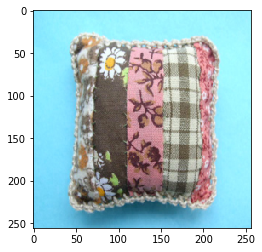

In [25]:
FILE_PATH = '/home/data/ilsvrc12-hkl/train_hkl_b256_b_256/0000.hkl'
hkl_file = hkl.load(FILE_PATH)
print(hkl_file.shape)

hkl_file = np.swapaxes(hkl_file,0,3)
print(hkl_file.shape)
print(hkl_file.dtype)

figure = hkl_file[0]
plt.imshow(figure)
plt.show()